# Lab 02
## Conrad Appel & Eric Hawkins

For this project, we used a data set called "[Comcast Customer Complaints](https://www.kaggle.com/archaeocharlie/comcastcomplaints)", which was uploaded to Kaggle by user Charlie H. The data set consists of CSVs, one containing information about customer complaints to Comcast and another containing information about customer complaints to the FCC about Comcast. Charlie H. scraped the data from consumeraffairs.com and cityexplainer after an overly lengthy support call in order to see if other customers had a similar experience.

Comcast is notorious for having bad customer service. By examining the complaints in this data set, we hoped to find what sorts of negative experiences have fueled this negative perception of the company's customer support.

In [1]:
import pandas as p
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
import seaborn as s
import matplotlib.pyplot as plt
from wordcloud import WordCloud # conda install -c https://conda.anaconda.org/amueller wordcloud
%matplotlib inline

In [2]:
data = p.read_csv('comcast-fcc-complaints-2015.csv')
print("Number of documents: " + str(len(data)))

Number of documents: 2225


In [10]:
stop_word_list = set("Follow up message by FCC on 2015 AM PM This constitutes a notice of informal complaint filed with the FCC against your company Your response to the consumer with a copy to the FCC is due no later than 30 days from the date of this notice For more information on your legal responsibilities see https us app box com complaintnotice If you have any questions regarding this notice please contact the at carriersupport gov".lower().split() + stopwords.words('english') + ['br', 'comcast', 'carrier'])

# Words to be ignored in addition to other stop words
# 'fcc', 'notice', 'response', '30', 'days', 'company', 'due', 'please', 'follow', and 'complaint' are included in the text of nearly every follow-up as part of a template
# 'br' may appear as an artifact of HTML formatting or incorrect stemming
# 'comcast' appears frequently as it is the subject of the complaints
# '2015' occurs in nearly every email as part of a date template, since this data set is from 2015.
stop_word_list.update(('would', 'get', 'gurmilap', 'chris'))
stop_word_list = list(stop_word_list)

bow_vectorizer = CountVectorizer(stop_words=list(stop_word_list))
bow = bow_vectorizer.fit_transform(data['Description'])

bow_df = p.DataFrame(data=bow.toarray(), columns=bow_vectorizer.get_feature_names())
print("Vocabulary size: "+str(len(bow_vectorizer.vocabulary_)))

Vocabulary size: 12399


In [11]:

tfidf_transformer = TfidfVectorizer(stop_words=list(stop_word_list))
tfidf = tfidf_transformer.fit_transform(data['Description'])

tfidf_df = p.DataFrame(data=tfidf.toarray(), columns=tfidf_transformer.get_feature_names())
tfidf_df.describe()

,00,000,0000,0002,0014e88cd784,0022102be93,0057,0069444,00a,00am,...,zeroed,zip,zipcode,zn0nyiqxvyz7kqurievnv3tye,zone,zoned,zones,zuckerberg,上午10,写道
count,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,...,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000
mean,0.013352,0.000767,0.000153,0.000084,0.000010,0.000095,0.000115,0.000024,0.000058,0.000654,...,0.000132,0.000692,0.000216,0.000044,0.000024,0.000046,0.000021,0.000057,0.000082,0.000082
std,0.041853,0.009578,0.004178,0.003975,0.000458,0.004466,0.005442,0.001122,0.002758,0.008738,...,0.004442,0.012784,0.006691,0.002083,0.001111,0.002168,0.001000,0.002706,0.003888,0.003888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.418304,0.185289,0.125811,0.187500,0.021604,0.210670,0.256682,0.052934,0.130091,0.189013,...,0.164093,0.426840,0.271383,0.098245,0.052427,0.102265,0.047189,0.127635,0.183384,0.183384


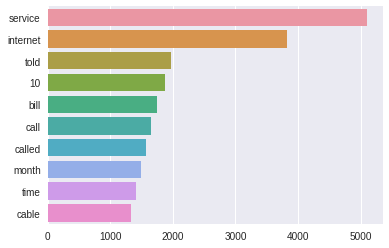

In [12]:
# top 10 words used
top_used_words = bow_df.sum().sort_values(ascending=False)[:10]

top_ax = s.barplot(top_used_words.values, top_used_words.index, orient="h")

The most common word accross the set is 'service'. From looking at the dataset, this appears to be from instances where a customer is complaining about their experience with Comcast's "customer service" or "service".

The second most common term is 'internet', which seems to show that a large number of customers are having problems with their Comcast-provided internet service. Of the services provided by Comcast, this seems to be the one that most people have a problem with, seeing as how words that might refer to the other services provided by Comcast, such as 'phone', 'cable', or 'voice', appear significantly less frequently. In the case of Comcast's voice service, this seems to reflect the trend of consumers shifting from home phones to using exclusively cell phones. In the case of their cable service, one might conclude that they relatively exceptional cable service or that not nearly as many customers use it.

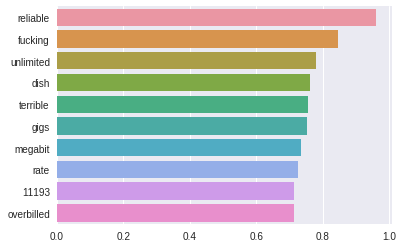

In [13]:
# heaviest weighted words
heaviest_words = tfidf_df.max().sort_values(ascending=False)[:10]

hv_ax = s.barplot(heaviest_words.values, heaviest_words.index, orient="h")

Tf-idf weighting refers to a statistic about the significance of a particular term in a document with in a collection of documents. Terms with the highest tf-idf rankings occur many times within a small number of documents. These scores are somewhat lower if the term occurs fewer times in a document or occurs across a large number of documents. This score is at its lower when the term occurs in nearly, if not, all documents.

The word with the greatest tf-idf value is 'reliable'. Ironically, in the dataset, this word seems to be used most frequently to describe either what the complaining customer's internet service is *not* or what it used to be but isn't anymore.

The second highest scoring term is 'fucking'. However, this doesn't mean that it occurs frequently across the dataset. Much of the reason why the term has such a high weighting is that it occurs *a lot* in a small number of documents.

For the most part, the remaining terms in the top ten are from complaints about Comcast's unlimited data plans, mentions of their competitor Dish, internet speed, and overbilling. One outlier is '11193', which seems to be the number of a customer support ticket that was never resolved. This term occurs only once across the entire dataset. However, the text of its entry is very short: "Ticket 11193 closed but no resolution was obtained". This ticket was closed on April 4, 2015". The brevity is likely what caused the term to score so high, and, since the only time it occurs in the data set was the day the ticket it refers to was closed, we can guess that this ticket was probably opened and discussed before the dataset started being collected, especially since the first entry occurs two days before on April 1, 2015.

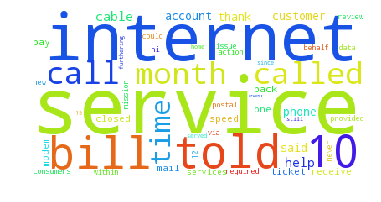

In [7]:
wc = WordCloud(max_words=50, background_color="white").generate_from_frequencies(bow_df.sum().sort_values(ascending=False).iteritems())
plt.axis("off")
wc_ax = plt.imshow(wc)